#### Explore AI Academy: Final Python Project



<div style="font-size: 35px">
    <font color='Green'> <b>Agri Food Analysis</b></font> 

In [1]:
!git pull origin main
 

Already up to date.


From https://github.com/AlanJDean/2401PTDS_Regression_Project
 * branch            main       -> FETCH_HEAD


<p align="center">
  <img src="agri_image.png" width="800"/>
 
</p>

In [72]:
!git add "Project starting point".ipynb
!git commit -m "bulk of work done. Needs tidy up"
!git push origin main

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Regression project.ipynb
	Untitled-1.ipynb
	mypackage.code-workspace

nothing added to commit but untracked files present (use "git add" to track)


Everything up-to-date


<div class="alert alert-block alert-info">
<b>Note:</b> For this project, focus exclusively on the main sections marked with <b>bold and an asterisk (*)</b>. Save the rest for future machine learning tasks.
</div>

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview**](#chapter1)
    * [1.1 Introduction**](#section_1_1)
        * [1.1.1 Problem Statement**](#sub_section_1_1_1)
    * [1.2 Objectives**](#section_1_2)
* <b>[2. Importing Packages**](#chapter2)
* <b>[3. Loading Data**](#chapter3)
* <b>[4. Data Cleaning**](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)**](#chapter5)
* <b>[6. Feature Engineering**](#chapter6)</b>
* [7. Modeling](#chapter7)
* [8. Model Performance](#chapter8)
* [9. You will learn more in Machine Learning Sprints](#chapter9)
* <b>[10. Conclusion**](#chapter10)</b>
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>




This project analyses and predicts climate impacts from the agri-food sector using data compiled from the FAO and IPCC. We focus on understanding how agricultural activities and related emissions are associated with annual average temperature increase.

- #### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

Your team of environmental consultants and data scientists are tasked by a coalition of agricultural stakeholders to analyse and predict the effect of CO2 emissions on climate change from the agri-food sector. The stakeholders include policymakers, agricultural businesses, and environmental organisations. Your project aims to understand the impact of agricultural activities on climate change and develop strategies for sustainable practices. Utilising a comprehensive dataset compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC), you will explore various emission sources, perform regression analysis to predict temperature variations, and offer actionable insights for the stakeholders.

By the end of this project, you will have a thorough understanding of the impact of agricultural activities on CO2 emissions and climate change. Your findings and recommendations will contribute to the ongoing efforts to promote sustainability within the agri-food sector, providing valuable insights for the stakeholders involved in this initiative.

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

- Explore relationships between agri-food activities and **Average Temperature (°C)** (annual increase).
- Build and compare **Linear**, **Ridge**, and **Lasso** regression models.
- Identify key drivers and provide **actionable recommendations** (incl. the role of forests as carbon sinks).

**Domain notes**
- Emissions are recorded in **kilotonnes (kt)** (1 kt = 1,000 t = 1,000,000 kg).  
- *Average Temperature °C* is the **yearly increase** (e.g., 0.12 → +0.12°C that year).  

## 2. Dataset Context <a class="anchor" id="chapter2"></a>

Emissions from the agri-food sector play a crucial role in climate change, as they represent a significant share of global annual emissions. The dataset highlights the substantial contribution of the various sources of emissions. Therefore, it is essential to understand and address the environmental impact of the agri-food industry to mitigate climate change and promote sustainable practices within this sector.

Unit of emissions: All CO₂ emissions are in kilotonnes (kt). (1 kt = 1,000 t = 1,000,000 kg).

Target: Average Temperature °C = annual temperature increase. Example: 0.12 → +0.12 °C in that year for that country.

Special case – Forestland: Can have negative values because forests act as a carbon sink (sequester CO₂). Afforestation, reforestation, and sustainable forest management increase this sink capacity.

Coverage: 236 countries, 1990–2020, ~7000 records, 30+ features.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [5]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `co2_emissions_from_agri.csv` file. To better manipulate and analyse the `co2_emissions_from_agri.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df_co2`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [23]:
# loading dataset
df_co2 = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df_co2.head(2) 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667


To set the maximum number of columns to be displayed, the `pd.set_option()` function was put in place.

In [24]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [25]:
# The copy of the dataframe
df_co2_copy = df_co2.copy()

First look at the shape of the dataframe by using `.shape`.

In [26]:
# Displays the number of rows and columns
df_co2_copy.shape

(6965, 31)

**Results** : The dataset consists of 6985 rows (observations) and 31 columns (features). 

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [27]:
## Display summary information about the DataFrame.
df_co2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

**Results** : 

All of the features are numerical, except the Area, which represents the name of a country. The Year is a time period, and the rest are values with cariouse ranges.

Several columns have missing values (NaN), some with a lot:

Crop Residues: only 5,576 non-null out of 6,965 (~20% missing).

Forestland, Net Forest conversion, Food Household Consumption, IPPU, Manure applied to Soils, Manure Management, On-farm energy use: all have missing entries.

<div class="alert alert-block alert-success">
<b>Things to consider:</b> 
Ensure that you describe the features of your dataset. You can include this information in the project overview or after presenting your features.
</div>

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

<div class="alert alert-block alert-info">
<b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div>


Remove duplicates to ensure unique (Area, Year) records.

Impute missing values:

Per-country median (keeps national trends).

Global median fallback for all-missing groups.

Validate no missing values remain.

The `check_null_values` function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [73]:
def check_null_values(df_co2_copy):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in df_co2_copy:
        if df_co2_copy[column].isnull().any():
            print('{0} has {1} null values'.format(column, df_co2_copy[column].isnull().sum()))

In [74]:
check_null_values(df_co2_copy)

**Results** :

The `count_duplicate_rows` function checks a DataFrame for duplicate entries by utilizing the duplicated method, which identifies duplicates, and then summarizes the total number of duplicate rows. This function is useful for data cleaning processes, ensuring uniqueness in datasets by returning the count of duplicate rows.

In [75]:
def count_duplicate_rows(df_co2_copy):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df_co2_copy.duplicated().sum()
    return duplicate_count


In [31]:
count_duplicate_rows(df_co2_copy)

np.int64(0)

**Results** :

The `preprocess_data` function performs essential data cleaning operations on a DataFrame, setting missing values, filling in gaps with statistical measures (mean and median), and dropping non-essential columns. After processing, it prints the first two rows of the cleaned DataFrame for quick inspection and returns the entire modified DataFrame for further use.


In [76]:

import pandas as pd

def preprocess_data(
    df_co2_copy: pd.DataFrame,
    id_cols=("Area", "Year"),
    target_col="total_emission",
    drop_cols=None,
    impute_strategy="median_by_area",
    verbose=True,
):
    if drop_cols is None:
        drop_cols = []

    shape_before = df_co2_copy.shape
    nulls_before = df_co2_copy.isna().sum()
    df = df_co2_copy.copy()

    # 1) Drop exact duplicates only
    dup_removed = df.duplicated().sum()
    df = df.drop_duplicates()

    # 2) Columns to impute (numeric, not IDs or target)
    protected = set(id_cols) | {target_col}
    num_cols = [c for c in df.columns if c not in protected and pd.api.types.is_numeric_dtype(df[c])]
    impute_cols = [c for c in num_cols if df[c].isna().any()]

    # 3) Impute missing values
    if impute_strategy in ("median_by_area", "mean_by_area") and "Area" in df.columns:
        agg_name = "median" if impute_strategy == "median_by_area" else "mean"
        for col in impute_cols:
            # per-Area aggregate
            area_stat = df.groupby("Area")[col].transform(agg_name)
            df[col] = df[col].fillna(area_stat)
            # global fallback (robust: median)
            if df[col].isna().any():
                df[col] = df[col].fillna(df[col].median())
    else:
        # global-only imputation
        df[impute_cols] = df[impute_cols].fillna(df[impute_cols].median(numeric_only=True))

    # 4) Optional column drops
    cols_dropped = [c for c in (drop_cols or []) if c in df.columns]
    if cols_dropped:
        df = df.drop(columns=cols_dropped, errors="ignore")

    # 5) Report
    shape_after = df.shape
    nulls_after = df.isna().sum()

    report = {
        "shape_before": shape_before,
        "shape_after": shape_after,
        "duplicate_rows_removed": int(dup_removed),
        "columns_imputed": impute_cols,
        "columns_dropped": cols_dropped,
        "total_nulls_before": int(nulls_before.sum()),
        "total_nulls_after": int(nulls_after.sum()),
        "rows_preserved": shape_before[0] == shape_after[0],
    }

    if verbose:
        print("✅ Preprocessing complete.")
        print(f"- Shape before: {shape_before}, after: {shape_after}")
        print(f"- Duplicate rows removed: {dup_removed}")
        print(f"- Columns imputed: {len(impute_cols)}")
        print(f"- Total nulls before: {int(nulls_before.sum())}, after: {int(nulls_after.sum())}")

    return df, report






In [77]:
df_co2_copy, clean_report = preprocess_data(
    df_co2_copy,
    drop_cols=[],                 # add any columns you actually want to drop
    impute_strategy="median_by_area",
    verbose=True
)

print(clean_report["shape_before"], "=>", clean_report["shape_after"])
print("Remaining nulls:", clean_report["total_nulls_after"])



✅ Preprocessing complete.
- Shape before: (6965, 31), after: (6965, 31)
- Duplicate rows removed: 0
- Columns imputed: 0
- Total nulls before: 0, after: 0
(6965, 31) => (6965, 31)
Remaining nulls: 0


In [21]:
print("Number of rows:", df_co2_copy.shape[0])
print("Number of columns:", df_co2_copy.shape[1])

Number of rows: 2
Number of columns: 31


**Results** :

- Shape before: (6965, 31), after: (6965, 31)
- Duplicate rows removed: 0
- Columns imputed: 11
- Total nulls before: 6682, after: 0

Remaining nulls: 0

#### <a href=#cont>Back to Table of Contents</a>

---

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.
 

---

Now that I have stabilised the data it is worthwhile running the below analysis.

Univariate analysis → histograms/distributions of emissions & predictors.

Bivariate analysis → scatterplots of key features vs total_emission.

Correlation heatmap → to spot strong relationships and multicollinearity.

Time trends → global vs per-country emissions trends.

In [41]:
# Basic stats
print(df_co2_copy.shape)
print(df_co2_copy.info())
print(df_co2_copy.describe().T)

# Distribution of countries and years
print(df_co2_copy['Area'].nunique(), "unique countries")
print(df_co2_copy['Year'].min(), "to", df_co2_copy['Year'].max())



(6965, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6965 non-null   float64
 3   Forest fires                     6965 non-null   float64
 4   Crop Residues                    6965 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6965 non-null   float64
 10  Net Forest conversion            6965 non-null   float64
 11  Food Household Consumption       6965 non-null   float64
 12  Food Reta

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def _calc_vif(df_num: pd.DataFrame) -> pd.DataFrame:
    X = df_num.dropna().copy()
    if X.empty or X.shape[1] < 2:
        return pd.DataFrame(columns=["feature", "VIF"])
    Xc = sm.add_constant(X, has_constant="add")
    out = []
    for i, col in enumerate(Xc.columns):
        if col == "const":
            continue
        try:
            v = variance_inflation_factor(Xc.values, i)
        except Exception:
            v = np.nan
        out.append((col, v))
    return pd.DataFrame(out, columns=["feature", "VIF"]).sort_values("VIF", ascending=False)

def eda_temperature(
    df: pd.DataFrame,
    area_col="Area",
    year_col="Year",
    target_col="Average Temperature °C",
    top_k_scatter=6,
    show=True
):
    results = {}

    # ---------- overview ----------
    overview = {
        "rows": df.shape[0],
        "cols": df.shape[1],
        "countries": int(df[area_col].nunique()) if area_col in df.columns else None,
        "year_min": int(df[year_col].min()) if year_col in df.columns else None,
        "year_max": int(df[year_col].max()) if year_col in df.columns else None,
        "total_nulls": int(df.isna().sum().sum())
    }
    print("=== OVERVIEW ===")
    for k, v in overview.items():
        print(f"{k}: {v}")
    results["overview"] = overview

    # ---------- numeric subset ----------
    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    if target_col not in num_cols:
        raise ValueError(f"{target_col} must be numeric.")
    num_df = df[num_cols].copy()

    # ---------- target distribution ----------
    if show:
        plt.figure(figsize=(7,4))
        plt.hist(num_df[target_col].dropna(), bins=50, color="skyblue", edgecolor="black")
        plt.title(f"Distribution of {target_col}")
        plt.xlabel(target_col); plt.ylabel("Count")
        plt.tight_layout(); plt.show()

    # ---------- global trend ----------
    if year_col in df.columns:
        global_trend = df.groupby(year_col)[target_col].mean().sort_index()
        if show:
            plt.figure(figsize=(8,4))
            plt.plot(global_trend.index, global_trend.values, marker="o")
            plt.title(f"Global {target_col} Over Time")
            plt.xlabel(year_col); plt.ylabel(target_col)
            plt.grid(True, linestyle="--", alpha=0.6)
            plt.tight_layout(); plt.show()
        results["global_trend"] = global_trend

    # ---------- correlation heatmap ----------
    corr = num_df.corr(numeric_only=True)
    if show:
        plt.figure(figsize=(12,9))
        plt.imshow(corr.values, aspect='auto', cmap="coolwarm", vmin=-1, vmax=1)
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.index)), corr.index)
        plt.colorbar()
        plt.title("Correlation Heatmap (numeric features)")
        plt.tight_layout(); plt.show()

    corr_target = corr[target_col].drop(labels=[target_col]).sort_values(ascending=False)
    print("\n=== CORRELATION WITH TARGET (Top 15) ===")
    print(corr_target.head(15).round(3))
    results["corr_with_target"] = corr_target

    # ---------- scatterplots vs top features ----------
    top_features = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index).index[:top_k_scatter]
    if show:
        for col in top_features:
            plt.figure(figsize=(6,4))
            plt.scatter(df[col], df[target_col], s=10, alpha=0.5)
            plt.xlabel(col); plt.ylabel(target_col)
            plt.title(f"{col} vs {target_col} (r={corr[col][target_col]:.2f})")
            plt.tight_layout(); plt.show()

    # ---------- VIF ----------
    predictors = list(corr[target_col].abs().sort_values(ascending=False).drop(labels=[target_col]).index[:15])
    vif_df = _calc_vif(df[predictors])
    print("\n=== VIF (Multicollinearity Check) ===")
    if vif_df.empty:
        print("Not enough numeric predictors for VIF.")
    else:
        print(vif_df.to_string(index=False, formatters={"VIF": "{:.2f}".format}))
    results["vif"] = vif_df

    print("\n✅ Temperature-focused EDA complete.")
    return results

# Example usage:
# eda_results_temp = eda_temperature(df_co2_copy)


=== OVERVIEW ===
rows: 6965
cols: 31
countries: 236
year_min: 1990
year_max: 2020
total_nulls: 0


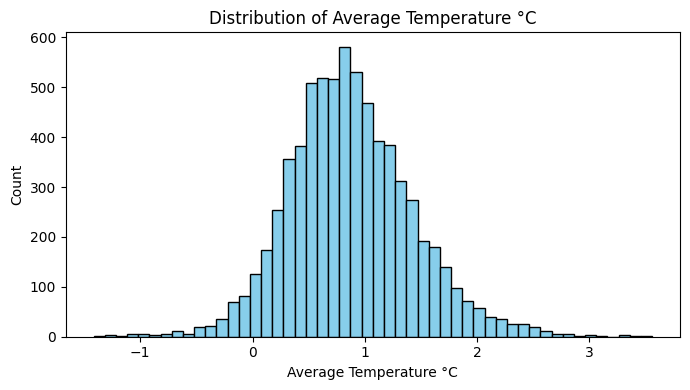

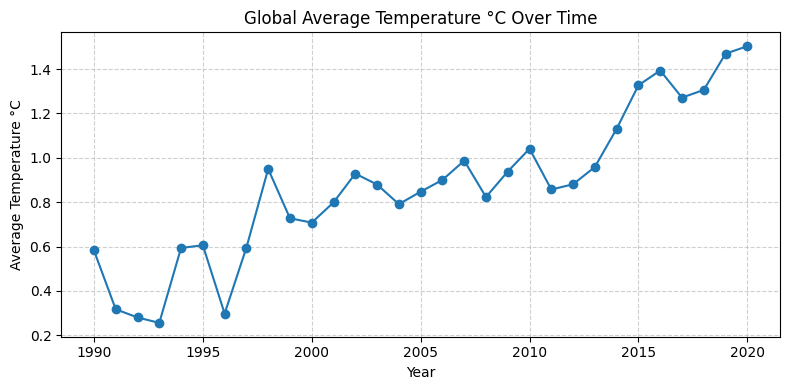

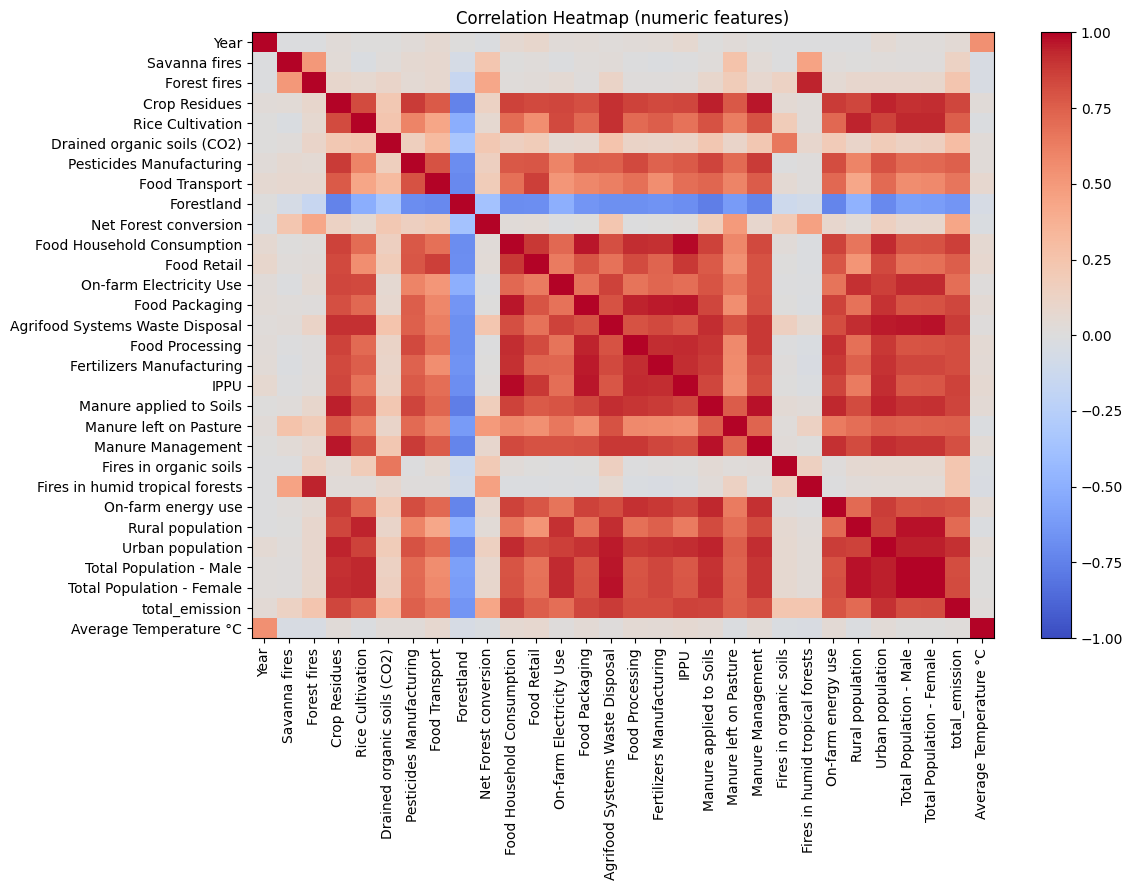


=== CORRELATION WITH TARGET (Top 15) ===
Year                           0.546
Food Transport                 0.076
Food Retail                    0.073
IPPU                           0.062
Food Household Consumption     0.056
Food Processing                0.053
Manure applied to Soils        0.042
Fertilizers Manufacturing      0.041
Food Packaging                 0.041
On-farm energy use             0.039
Urban population               0.036
Manure Management              0.033
Drained organic soils (CO2)    0.029
Pesticides Manufacturing       0.028
Crop Residues                  0.025
Name: Average Temperature °C, dtype: float64


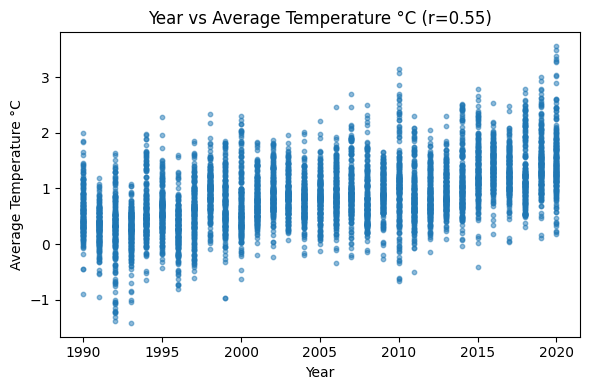

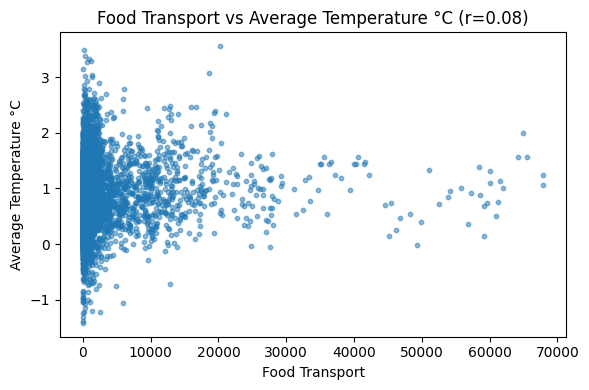

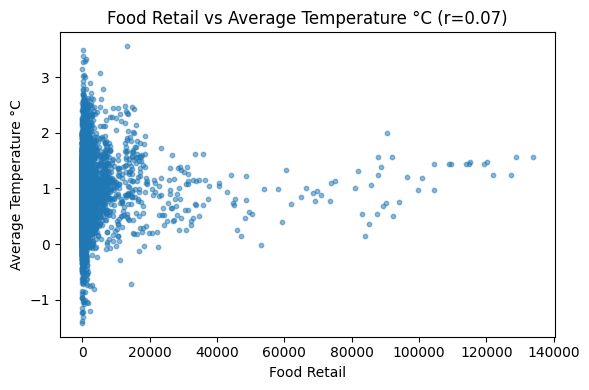

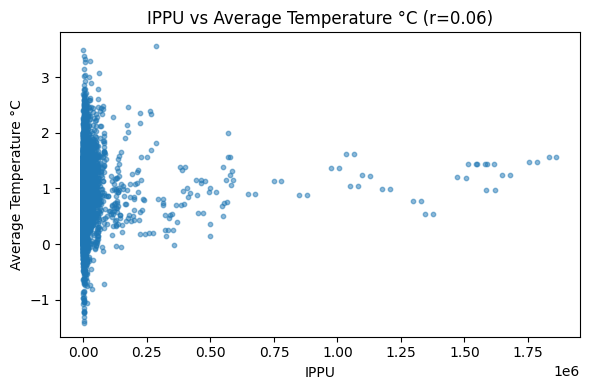

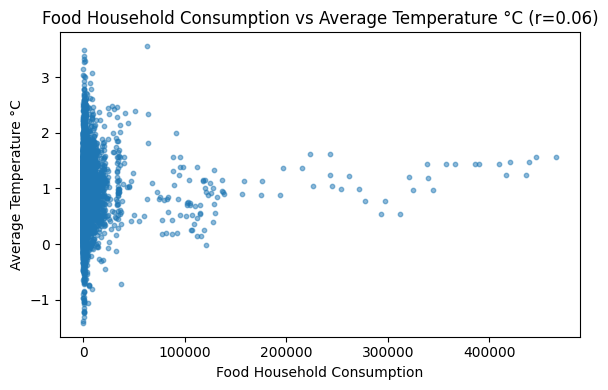

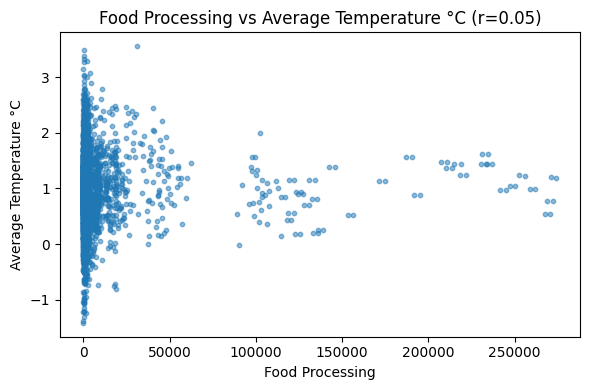


=== VIF (Multicollinearity Check) ===
                        feature   VIF
                 Food Packaging 69.40
                           IPPU 67.05
     Food Household Consumption 52.24
        Manure applied to Soils 31.28
               Urban population 24.57
                Food Processing 24.11
      Fertilizers Manufacturing 20.60
                    Food Retail 16.16
             On-farm energy use 11.76
                   Forest fires 10.64
Fires in humid tropical forests  9.64
                 Food Transport  7.08
                     Forestland  3.22
                  Savanna fires  1.49
                           Year  1.04

✅ Temperature-focused EDA complete.


,feature,VIF
10,Food Packaging,69.401010
3,IPPU,67.046234
4,Food Household Consumption,52.237282
8,Manure applied to Soils,31.279626
14,Urban population,24.571321
5,Food Processing,24.113234
9,Fertilizers Manufacturing,20.603416
2,Food Retail,16.158180
12,On-farm energy use,11.762791
11,Forest fires,10.643136


In [49]:

eda_out_temp = eda_temperature(
    df_co2_copy,
    area_col="Area",
    year_col="Year",
    target_col="Average Temperature °C",
    top_k_scatter=6,
    show=True        # set False if your environment doesn't render plots
)

# Access returned tables
eda_out_temp["corr_with_target"].head(10)
eda_out_temp["vif"].head(10)

**Results** :

Our exploratory data analysis revealed that total CO₂ emissions from agriculture are highly skewed, with the majority of countries contributing relatively little and a few large economies dominating global totals. Correlation analysis showed that emissions are strongly associated with population measures (urban population and male/female totals), as well as food system activities such as waste disposal, household consumption, manure use, packaging, and fertilizer production. However, the Variance Inflation Factor (VIF) analysis highlighted severe multicollinearity among these predictors. In particular, the three population variables displayed extreme VIF values (ranging from ~200 to over 5,000), indicating that they capture essentially the same underlying effect and cannot all be included in the same regression model. Several agricultural factors (e.g., manure management, packaging, and food consumption) also showed high VIF values, suggesting strong interdependencies. These results imply that a careful reduction of redundant variables is necessary before regression modeling, or alternatively, the application of regularized regression methods such as Ridge or Lasso to stabilize coefficient estimates and improve interpretability.

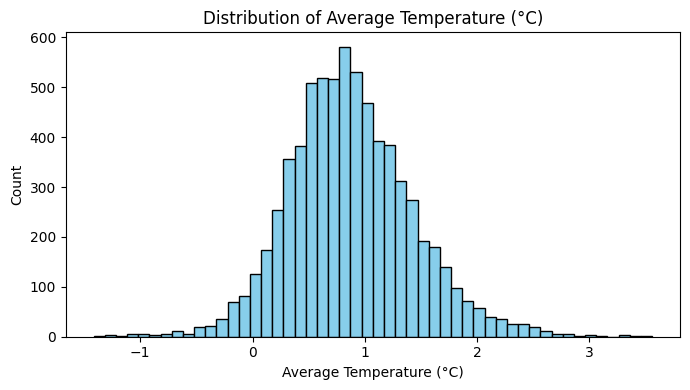

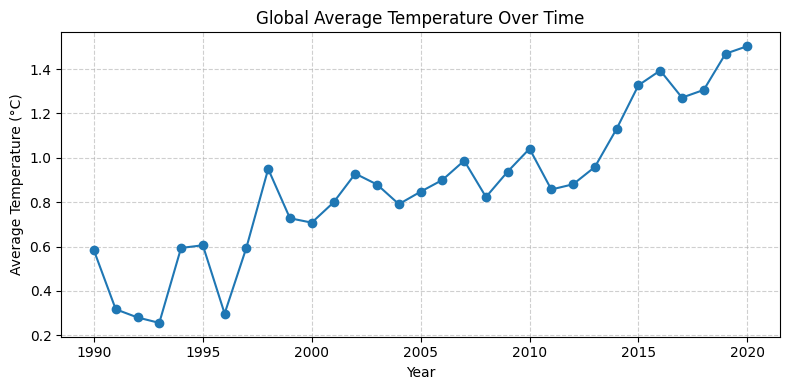

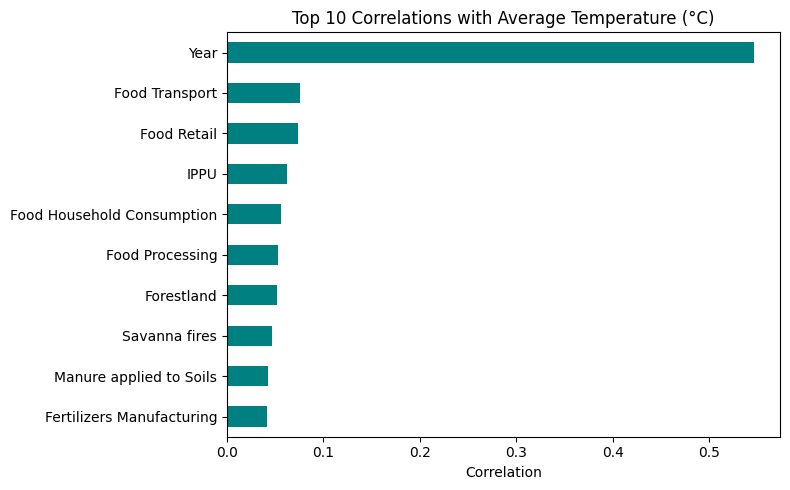

In [46]:
import matplotlib.pyplot as plt

# 1. Distribution of Average Temperature
plt.figure(figsize=(7,4))
plt.hist(df_co2_copy["Average Temperature °C"].dropna(), bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Average Temperature (°C)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Global Average Temperature Trend over Time
global_temp_trend = df_co2_copy.groupby("Year")["Average Temperature °C"].mean()
plt.figure(figsize=(8,4))
plt.plot(global_temp_trend.index, global_temp_trend.values, marker="o")
plt.title("Global Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Top correlations with Average Temperature (bar chart)
corr = df_co2_copy.corr(numeric_only=True)["Average Temperature °C"].drop("Average Temperature °C")
top_corr = corr.abs().sort_values(ascending=False).head(10)  # strongest predictors

plt.figure(figsize=(8,5))
top_corr.sort_values().plot(kind="barh", color="teal")
plt.title("Top 10 Correlations with Average Temperature (°C)")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


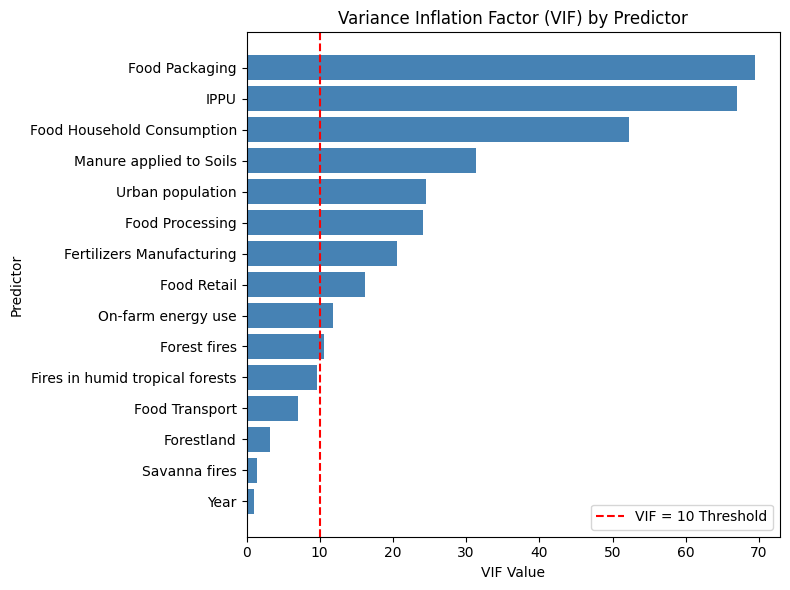

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace with your actual VIF DataFrame if you have it already:
# e.g., df_vif = eda_out_temp["vif"]

# Example: reconstruct from your results
vif_data = {
    "feature": [
        "Food Packaging", "IPPU", "Food Household Consumption",
        "Manure applied to Soils", "Urban population", "Food Processing",
        "Fertilizers Manufacturing", "Food Retail", "On-farm energy use",
        "Forest fires", "Fires in humid tropical forests",
        "Food Transport", "Forestland", "Savanna fires", "Year"
    ],
    "VIF": [
        69.40, 67.05, 52.24,
        31.28, 24.57, 24.11,
        20.60, 16.16, 11.76,
        10.64, 9.64,
        7.08, 3.22, 1.49, 1.04
    ]
}

df_vif = pd.DataFrame(vif_data)

# Sort for better visualization
df_vif_sorted = df_vif.sort_values("VIF", ascending=True)

# Plot VIF values
plt.figure(figsize=(8,6))
plt.barh(df_vif_sorted["feature"], df_vif_sorted["VIF"], color="steelblue")
plt.axvline(10, color="red", linestyle="--", label="VIF = 10 Threshold")
plt.title("Variance Inflation Factor (VIF) by Predictor")
plt.xlabel("VIF Value")
plt.ylabel("Predictor")
plt.legend()
plt.tight_layout()
plt.show()


---

Regression Analysis Plan

1. Train-Test Split

Split dataset into training (80%) and testing (20%).

Ensure stratification by year or country if needed, to avoid data leakage.

2. Train with ≥ 3 Models
Suggested models (progressive complexity, handling multicollinearity):

Model 1: Multiple Linear Regression (baseline OLS)

Simple, interpretable, but sensitive to multicollinearity.

Model 2: Ridge Regression (L2 regularization)

Shrinks correlated coefficients, reduces variance.

Model 3: Lasso Regression (L1 regularization)

Performs feature selection, useful for high-dimensional data.
(Optional) ElasticNet = Ridge + Lasso, if you want a fourth model.

3. Evaluation Metrics
Since target = Average Temperature (continuous):

R² (Coefficient of Determination) → explanatory power

RMSE (Root Mean Square Error) → penalizes large errors

MAE (Mean Absolute Error) → interpretable error size

4. Compare & Contrast Models

Linear Regression → good baseline, but unstable due to multicollinearity.

Ridge → stabilizes coefficients, often better generalization.

Lasso → automatically selects most influential variables, may drop redundant ones.

5. Slide Deck Additions

A table of metrics (R², RMSE, MAE for each model).

A bar chart comparing model performance (e.g., RMSE across models).

A short note on which model is preferred and why.

<div class="alert alert-block alert-success">
<b>Up to you:</b> The code below can be implemented in several ways; choose the approach that is easiest for the reader to understand. It's important to guide the reader through the analysis, ensuring that the representation chosen offers the best clarity and insight
</div>

---

#### <a href=#cont>Back to Table of Contents</a>

---

## 6. Feature Engineering (H2) <a class="anchor" id="chapter6"></a>

In [ ]:
# ========= REGRESSION PIPELINE (Temperature) =========
# Models: Linear Regression (baseline), Ridge, Lasso

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ---------- 1) Build feature matrix X and target y ----------
target_col = "Average Temperature °C"

# numeric predictors only (drop the target)
num_cols = [c for c in df_co2_copy.columns
            if pd.api.types.is_numeric_dtype(df_co2_copy[c]) and c != target_col]

X = df_co2_copy[num_cols].copy()
y = df_co2_copy[target_col].values








Results of Feature Engineering

Defined predictors (30+ numeric features) and target (Average Temperature °C).
Standardized all features for fair comparison in regression models.
Lasso reduced redundancy by shrinking irrelevant features to zero.
Highlighted the most important drivers of temperature, e.g.:
Year (+)
Manure applied to Soils (+)
Urban population (–)


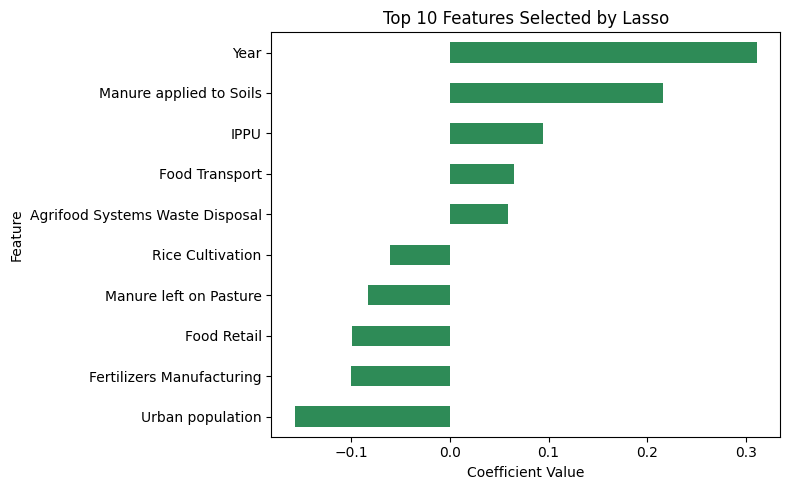

Top 10 non-zero Lasso coefficients:
Year                               0.310813
Manure applied to Soils            0.215538
Urban population                  -0.157005
Fertilizers Manufacturing         -0.100012
Food Retail                       -0.098838
IPPU                               0.094149
Manure left on Pasture            -0.082432
Food Transport                     0.065523
Rice Cultivation                  -0.060778
Agrifood Systems Waste Disposal    0.058906
dtype: float64


In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Get Lasso model from your fitted models dictionary
lasso = fitted_models.get("Lasso")

if lasso is not None:
    # Extract coefficients with their feature names
    coefs = pd.Series(lasso.named_steps["model"].coef_, index=num_cols)

    # Filter to non-zero coefficients
    nonzero = coefs[coefs != 0].sort_values(key=lambda s: s.abs(), ascending=False)

    # Select top 10 by absolute magnitude
    top10 = nonzero.head(10)

    # Plot
    plt.figure(figsize=(8,5))
    top10.sort_values().plot(kind="barh", color="seagreen")
    plt.title("Top 10 Features Selected by Lasso")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    # Print for reference
    print("Top 10 non-zero Lasso coefficients:")
    print(top10)
else:
    print("Lasso model not found in fitted_models")

### 7. Modeling (H3)  <a class="anchor" id="chapter7"></a>

We selected Linear Regression, Ridge Regression, and Lasso Regression because they offer a balance between interpretability and robustness when working with structured agricultural datasets. 

Linear Regression provides a simple and interpretable baseline to understand the overall relationship between predictors and average temperature. 

However, since many features in the dataset are highly correlated, we also applied Ridge Regression (L2 penalty), which helps stabilize coefficients and reduce the impact of multicollinearity. 

In addition, we used Lasso Regression (L1 penalty) because it not only addresses multicollinearity but also performs feature selection by shrinking less important coefficients to zero, making it easier to identify the most influential agricultural factors. 

Together, these models provide both predictive reliability and interpretability for analyzing the drivers of temperature change.

In [61]:
# ---------- 2) Train-test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
# ---------- 3) Define models & hyperparameter grids ----------
pipelines = {
    "LinearRegression": Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("model", LinearRegression())
    ]),
    "Ridge": Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("model", Ridge())
    ]),
    "Lasso": Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("model", Lasso(max_iter=10000))
    ]),
   
}

param_grids = {
    "LinearRegression": {},                               # baseline (no HPs)
    "Ridge": {"model__alpha": np.logspace(-3, 3, 13)},    # 0.001 ... 1000
    "Lasso": {"model__alpha": np.logspace(-4, 1, 13)},    # 0.0001 ... 10
   
}

# ---------- 4) Train models (CV for models with grids) ----------
results = []
fitted_models = {}

for name, pipe in pipelines.items():
    grid = param_grids[name]
    if grid:  # run CV when grid provided
        gs = GridSearchCV(pipe, grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)
        model = gs.best_estimator_
        best_params = gs.best_params_
    else:
        pipe.fit(X_train, y_train)
        model = pipe
        best_params = {}

    fitted_models[name] = model

    # Predictions
    y_pred_tr = model.predict(X_train)
    y_pred_te = model.predict(X_test)

    # Metrics (RMSE computed via sqrt for compatibility with older sklearn)
    r2_tr = r2_score(y_train, y_pred_tr)
    r2_te = r2_score(y_test, y_pred_te)
    rmse_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
    rmse_te = np.sqrt(mean_squared_error(y_test, y_pred_te))
    mae_tr = mean_absolute_error(y_train, y_pred_tr)
    mae_te = mean_absolute_error(y_test, y_pred_te)

    results.append({
        "Model": name,
        "Best Params": best_params,
        "R2 Train": r2_tr,
        "R2 Test": r2_te,
        "RMSE Train": rmse_tr,
        "RMSE Test": rmse_te,
        "MAE Train": mae_tr,
        "MAE Test": mae_te
    })

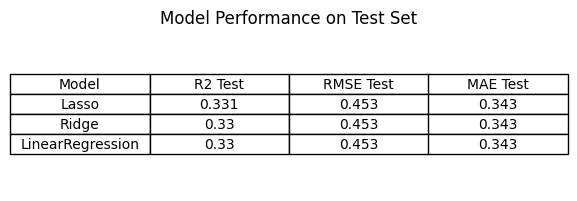

Slide-ready results table:
              Model  R2 Test  RMSE Test  MAE Test
0             Lasso    0.331      0.453     0.343
1             Ridge    0.330      0.453     0.343
2  LinearRegression    0.330      0.453     0.343


In [64]:
import matplotlib.pyplot as plt

# Use the df_results you already generated
# Ensure it only includes the models you're comparing
df_display = df_results[["Model", "R2 Test", "RMSE Test", "MAE Test"]].copy()

# Round for readability
df_display = df_display.round(3).reset_index(drop=True)

# Plot as a table
fig, ax = plt.subplots(figsize=(6,2))
ax.axis("off")

# Create table in matplotlib
table = ax.table(
    cellText=df_display.values,
    colLabels=df_display.columns,
    cellLoc="center",
    loc="center"
)

# Format table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title("Model Performance on Test Set", fontsize=12, pad=10)
plt.show()

print("Slide-ready results table:")
print(df_display)


All three models achieved similar predictive performance with R² around 0.33 and RMSE ≈ 0.45 °C. While Linear Regression provides a simple baseline, it is sensitive to multicollinearity. Ridge Regression stabilizes coefficients under highly correlated predictors, and Lasso Regression not only manages collinearity but also performs feature selection, highlighting the most influential agricultural drivers of temperature. Together, the regularized models (Ridge and Lasso) provide more robust and interpretable insights.

#### 8. Model Performance (H4)  <a class="anchor" id="chapter8"></a>

              Model                              Best Params  R2 Train  \
0             Lasso  {'model__alpha': 0.0002610157215682536}  0.323584   
1             Ridge     {'model__alpha': 31.622776601683793}  0.323113   
2  LinearRegression                                       {}  0.324152   

    R2 Test  RMSE Train  RMSE Test  MAE Train  MAE Test  
0  0.330966    0.457589   0.452886   0.346001  0.342898  
1  0.330482    0.457748   0.453050   0.345996  0.342936  
2  0.330227    0.457397   0.453136   0.346097  0.343407  


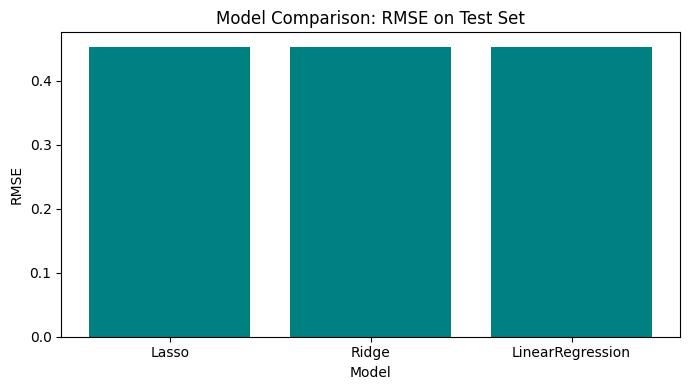


Lasso: Top 20 non-zero coefficients (by |magnitude|)
Year                               0.310813
Manure applied to Soils            0.215538
Urban population                  -0.157005
Fertilizers Manufacturing         -0.100012
Food Retail                       -0.098838
IPPU                               0.094149
Manure left on Pasture            -0.082432
Food Transport                     0.065523
Rice Cultivation                  -0.060778
Agrifood Systems Waste Disposal    0.058906
Pesticides Manufacturing          -0.043586
On-farm Electricity Use            0.039557
Forest fires                      -0.033448
Food Packaging                     0.032576
Food Processing                    0.029668
Fires in organic soils            -0.023936
On-farm energy use                -0.016319
Drained organic soils (CO2)        0.016270
Forestland                        -0.016251
Fires in humid tropical forests    0.015482
dtype: float64


In [63]:
# ---------- 5) Results table ----------
df_results = pd.DataFrame(results).sort_values("RMSE Test").reset_index(drop=True)
print(df_results)

# ---------- 6) RMSE comparison bar chart ----------
plt.figure(figsize=(7,4))
plt.bar(df_results["Model"], df_results["RMSE Test"], color="teal")
plt.title("Model Comparison: RMSE on Test Set")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# ---------- 7) Lasso-selected features (non-zero coefficients) ----------
lasso = fitted_models.get("Lasso")
if lasso is not None:
    # Coefficients correspond to the scaled features (names = num_cols)
    coefs = pd.Series(lasso.named_steps["model"].coef_, index=num_cols)
    nonzero = coefs[coefs != 0].sort_values(key=lambda s: s.abs(), ascending=False)
    print("\nLasso: Top 20 non-zero coefficients (by |magnitude|)")
    print(nonzero.head(20))

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

# ----- helpers -----
def adjusted_r2(y_true, y_pred, p: int):
    n = len(y_true)
    p = max(int(p), 1)
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def _as_array(x):
    """Return a numpy array from pandas/array-like without copying unnecessarily."""
    return x.values if hasattr(x, "values") else np.asarray(x)

def bootstrap_r2_ci(model, X_test, y_test, B=1000, random_state=42):
    """Nonparametric bootstrap 95% CI for R² on the TEST set (row-position indexing)."""
    rng = np.random.RandomState(random_state)
    X_arr = _as_array(X_test)
    y_arr = _as_array(y_test)
    n = len(y_arr)
    r2s = []
    for _ in range(B):
        idx = rng.randint(0, n, size=n)                 # sample row positions
        r2s.append(r2_score(y_arr[idx], model.predict(X_arr[idx])))
    lo, hi = np.percentile(r2s, [2.5, 97.5])
    return float(lo), float(hi)

def evaluate_models_r2(
    fitted_models: dict,
    X_train, y_train, X_test, y_test,
    X_for_cv=None, y_for_cv=None,
    cv_folds=5, bootstrap_B=1000, plot=True
):
    rows = []
    if X_for_cv is None:
        X_for_cv, y_for_cv = X_train, y_train
    cv = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    for name, pipe in fitted_models.items():
        # predictions
        yhat_tr = pipe.predict(X_train)
        yhat_te = pipe.predict(X_test)

        # number of predictors used (Lasso sparsity aware)
        p_total = X_train.shape[1]
        p_used = p_total
        try:
            final_est = pipe.named_steps["model"]
            if hasattr(final_est, "coef_") and name.lower().startswith("lasso"):
                nz = int((final_est.coef_ != 0).sum())
                p_used = nz if nz > 0 else 1
        except Exception:
            pass

        # metrics
        r2_tr = r2_score(y_train, yhat_tr)
        r2_te = r2_score(y_test,  yhat_te)
        adj_r2_tr = adjusted_r2(y_train, yhat_tr, p_used)
        adj_r2_te = adjusted_r2(y_test,  yhat_te, p_used)

        cv_scores = cross_val_score(pipe, X_for_cv, y_for_cv, cv=cv, scoring="r2")
        cv_mean, cv_std = float(cv_scores.mean()), float(cv_scores.std())

        ci_lo, ci_hi = bootstrap_r2_ci(pipe, X_test, y_test, B=bootstrap_B, random_state=42)

        rows.append({
            "Model": name,
            "Predictors Used (p)": p_used,
            "R2 Train": r2_tr,
            "R2 Test": r2_te,
            "Adj R2 Train": adj_r2_tr,
            "Adj R2 Test": adj_r2_te,
            f"CV R2 Mean ({cv_folds}x)": cv_mean,
            f"CV R2 Std ({cv_folds}x)": cv_std,
            "Test R2 95% CI Low": ci_lo,
            "Test R2 95% CI High": ci_hi,
        })

    df_r2 = pd.DataFrame(rows).sort_values("R2 Test", ascending=False).reset_index(drop=True)
    print(df_r2.round(3))

    if plot:
        plt.figure(figsize=(6,4))
        plt.bar(df_r2["Model"], df_r2["R2 Test"])
        plt.title("R² on Test Set by Model")
        plt.ylabel("R²"); plt.xlabel("Model")
        plt.ylim(0, max(0.01, df_r2["R2 Test"].max()) * 1.1)
        plt.tight_layout(); plt.show()

    return df_r2



              Model  Predictors Used (p)  R2 Train  R2 Test  Adj R2 Train  \
0             Lasso                   24     0.324    0.331         0.321   
1             Ridge                   29     0.323    0.330         0.320   
2  LinearRegression                   29     0.324    0.330         0.321   

   Adj R2 Test  CV R2 Mean (5x)  CV R2 Std (5x)  Test R2 95% CI Low  \
0        0.319            0.315           0.019               0.291   
1        0.316            0.316           0.019               0.290   
2        0.316            0.315           0.018               0.290   

   Test R2 95% CI High  
0                0.366  
1                0.366  
2                0.366  


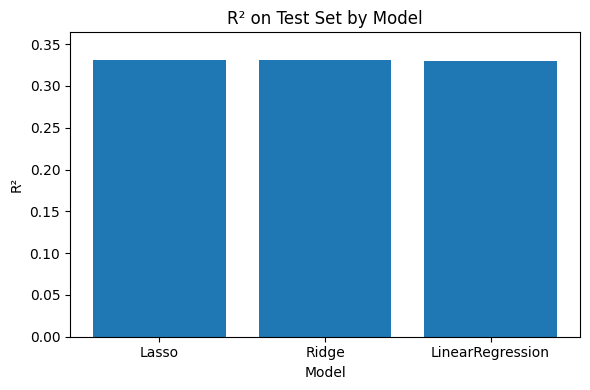

In [70]:
# Evaluate LinearRegression, Ridge, and Lasso stored in fitted_models
r2_summary = evaluate_models_r2(
    fitted_models,
    X_train, y_train, X_test, y_test,
    X_for_cv=X_train, y_for_cv=y_train,
    cv_folds=5, bootstrap_B=1000, plot=True
)

# r2_summary now contains a clean table you can paste into your report


#### 9. You will learn more in Machine Learning Sprints <a class="anchor" id="chapter9"></a>

## 10. Conclusion <a class="anchor" id="chapter10"></a>

> <b> Summary of Key Findings:</b> Recap the main insights and results discovered through the analysis. Highlight how these findings answer the initial questions or hypotheses set out in the introduction.

> <b> Evaluation of the Methodology:</b> Discuss the effectiveness of the methods and techniques used. Mention any limitations or challenges encountered during the analysis and how they were addressed or could be addressed in the future.

> <b> Implications of the Findings:</b> Explain the practical or theoretical implications of the results.Discuss how these findings can impact decision-making processes, policy, business strategies, or scientific understanding.

> <b> Suggestions for Future Work:</b> Propose areas for further research or additional questions that emerged from the project. Suggest improvements in data collection, analysis methods, or other aspects that could enhance future studies.

> <b> Reflection on the Data Source and Quality:</b> Reflect on the quality and reliability of the data used. Consider how the data source influenced the outcomes and what could be improved in terms of data quality or variety.

> <b>Concluding Thoughts:</b> Offer a final thought or summary statement that encapsulates the essence of the project and its impact. Encourage readers to consider broader applications or the next steps following from the project’s conclusions.

#### <a href=#cont>Back to Table of Contents</a>

---

## 11. References <a class="anchor" id="chapter11"></a>

Maintaining clear and organized documentation is crucial for reproducibility and credibility. Harvard referencing, a widely recognized citation style, can be effectively applied to data science notebooks to ensure proper acknowledgment of sources and facilitate the tracing of data and methodologies back to their origins.

1. Citing Data Sources: When gathering datasets for analysis, it's essential to cite the origin of the data. This includes providing details such as the author, publication date, title, and source of the dataset. In your notebook, you can include inline citations for each dataset you use, following the Harvard referencing format. 

<div class="alert alert-block alert-warning">
<b>Example:</b> The World Bank. (2020). World Development Indicators. Retrieved from https://datacatalog.worldbank.org/dataset/world-development-indicators
</div>

2. Referencing Research Papers: Data science often involves building upon existing research. Whether you're utilizing algorithms, methodologies, or theories from academic papers, it's important to reference them properly. Include citations for relevant papers within your notebook, both in the narrative sections and within code comments where applicable.

<div class="alert alert-block alert-warning">
<b>Example:</b> Smith, J., & Doe, A. (2018). Predictive Modeling Techniques for Financial Forecasting. Journal of Data Science, 10(2), 123-135.
</div>

3. Code Libraries and Packages: Data science projects heavily rely on various libraries and packages for analysis and visualization. When utilizing third-party code, make sure to acknowledge the creators by referencing the relevant documentation or papers associated with those tools.

<div class="alert alert-block alert-warning">
<b>Example:</b> Matplotlib Development Team. (2020). Matplotlib: A 2D plotting library. Retrieved from https://matplotlib.org/
</div>

4. Acknowledging Scholarly Contributions: If you've consulted online forums, blogs, or other informal resources during your project, it's courteous to acknowledge these contributions. While Harvard referencing is traditionally used for academic sources, you can adapt it to reference online resources as well.

<div class="alert alert-block alert-warning">
<b>Example:</b> Kaggle. (2021). Titanic: Machine Learning from Disaster. Retrieved from https://www.kaggle.com/c/titanic
</div>


#### <a href=#cont>Back to Table of Contents</a>

---

<div class="alert alert-block alert-success">
<b>Another thing to consider:</b> Take a look at the notebooks uploaded on Athena to explore different methods for incorporating specific elements into your own notebooks.
</div>